# Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()
import warnings
warnings.filterwarnings('ignore')

## https://archive-beta.ics.uci.edu/dataset/352/online+retail

In [10]:
retail = pd.read_excel('Online Retail.xlsx')

In [11]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
retail_df = retail.copy()

In [13]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
retail_df.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


### Data Preparation & Exploration

In [15]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
retail_df.dropna(inplace= True)

In [17]:
retail_df.shape

(406829, 8)

In [18]:
retail_df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object

In [19]:
retail_df.groupby('Description').agg({'Quantity':'sum'}).sort_values('Quantity', ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [20]:
retail_df['InvoiceNo'].str.contains('C').count()

np.int64(8905)

In [21]:
retail_df[~retail_df['InvoiceNo'].str.contains('C', na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [22]:
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']

In [23]:
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


### RFM Analysis

In [24]:
import datetime as dt

In [25]:
retail_df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [26]:
today_date = dt.datetime(2011, 12, 11)

In [30]:
rfm = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days, 
                                          'InvoiceNo' : lambda num: num.nunique(),
                                           'TotalPrice': lambda TotalPrice: TotalPrice.sum()
                                          })
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [31]:
rfm.columns = ['Recency' , 'Frequency' , 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [32]:
rfm = rfm[rfm['Monetary'] > 0]
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
12352.0,37,11,1545.41
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,3,176.60


In [33]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4320.0,90.892130,99.142113,1.000000e+00,17.000,50.00,139.00,374.00
Frequency,4320.0,5.117130,9.386392,1.000000e+00,1.000,3.00,6.00,248.00
Monetary,4320.0,1924.373832,8264.936833,7.105427e-15,302.435,657.85,1626.26,279489.02


In [36]:
rfm['recency_score'] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])

In [37]:
rfm['frequency_score'] = pd.qcut(rfm['Frequency'].rank(method = 'first'), 5, labels=[1, 2, 3, 4, 5])

In [40]:
rfm['monetary_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [41]:
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12347.0,3,7,4310.00,5,4,5
12348.0,76,4,1797.24,2,3,4
12349.0,19,1,1757.55,4,1,4
12350.0,311,1,334.40,1,1,2
12352.0,37,11,1545.41,3,5,4


In [42]:
rfm['RFM_SCORE'] = (rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str))

In [44]:
rfm.head(10)

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12347.0,3,7,4310.00,5,4,5,54
12348.0,76,4,1797.24,2,3,4,23
12349.0,19,1,1757.55,4,1,4,41
12350.0,311,1,334.40,1,1,2,11
12352.0,37,11,1545.41,3,5,4,35
12353.0,205,1,89.00,1,1,1,11
12354.0,233,1,1079.40,1,1,4,11
12355.0,215,1,459.40,1,1,2,11
12356.0,23,3,2811.43,4,3,5,43


In [45]:
# Segmenting Customers Using RFM Score

seg_map = {
    r'[1-2][1-2]' : 'hibernating',
    r'[1-2][3-4]' : 'at_Risk',
    r'[1-2]5' : 'cant_loose',
    r'3[1-2]' : 'about_to_sleep',
    r'33' : 'need_attention',
    r'[3-4][4-5]' : 'loyal_customers',
    r'41' : 'promising',
    r'51' : 'new_customers',
    r'5[4-5]' : 'champions',
}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12347.0,3,7,4310.00,5,4,5,54,champions
12348.0,76,4,1797.24,2,3,4,23,at_Risk
12349.0,19,1,1757.55,4,1,4,41,promising
12350.0,311,1,334.40,1,1,2,11,hibernating
12352.0,37,11,1545.41,3,5,4,35,loyal_customers


In [46]:
rfm[['segment', 'Recency', 'Frequency', 'Monetary']].groupby('segment').agg(['mean', 'count', 'max']).round()

Recency            Frequency            Monetary        \
                   mean count  max      mean count  max     mean count   
segment                                                                  
42                 24.0   122   32       2.0   122    2    429.0   122   
43                 23.0   173   32       3.0   173    4    841.0   173   
52                  7.0    71   12       2.0    71    2    615.0    71   
53                  6.0   131   12       3.0   131    4    878.0   131   
about_to_sleep     52.0   360   71       1.0   360    2    440.0   360   
at_Risk           156.0   605  373       3.0   605    7    970.0   605   
cant_loose        132.0    70  313      10.0    70   35   2383.0    70   
champions           6.0   659   12      15.0   659  248   6552.0   659   
hibernating       214.0  1037  374       1.0  1037    2    400.0  1037   
loyal_customers    33.0   776   71       8.0   776   76   2733.0   776   
need_attention     49.0   178   71       3.0   178    4    821.0   178   
new_customers       7.0    42   12       1.0    42    1    377.0    42   
promising          23.0    96   32       1.0    96    1    306.0    96   

                           
                      max  
segment                    
42                 2907.0  
43                 6749.0  
52                 3193.0  
53                12394.0  
about_to_sleep     6208.0  
at_Risk           21536.0  
cant_loose        10217.0  
champions        279489.0  
hibernating        7830.0  
loyal_customers  123725.0  
need_attention     3546.0  
new_customers      3861.0  
promising          1758.0

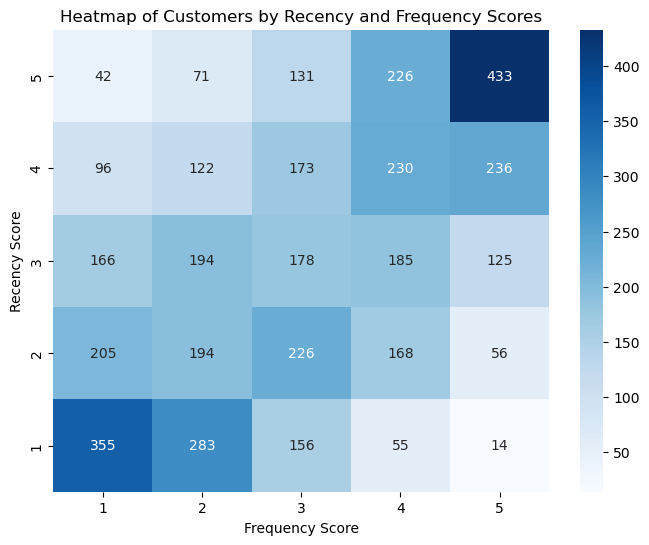

In [52]:

rfm_segment_count = rfm.groupby(['recency_score','frequency_score'])['segment'].count().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(rfm_segment_count, cmap="Blues", annot=True, fmt=".0f")
plt.title("Heatmap of Customers by Recency and Frequency Scores")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")
plt.show()


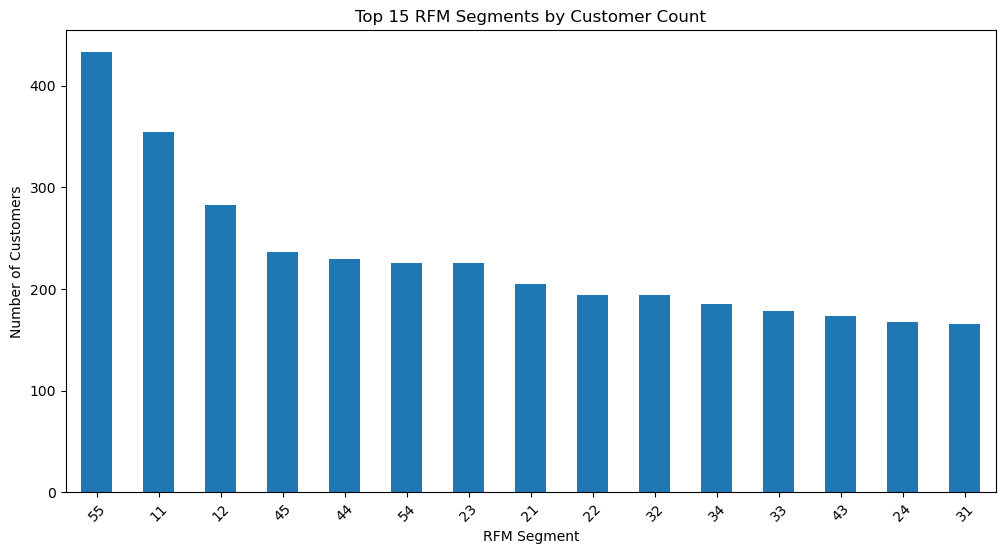

In [53]:
segment_counts = rfm['RFM_SCORE'].value_counts()

plt.figure(figsize=(12,6))
segment_counts.head(15).plot(kind='bar')
plt.title("Top 15 RFM Segments by Customer Count")
plt.xlabel("RFM Segment")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


In [55]:
def rfm_level(row):
    if row['recency_score'] >= 4 and row['recency_score'] >= 4 and row['monetary_score'] >= 4:
        return 'Champions'
    elif row['recency_score'] >= 3:
        return 'Loyal Customers'
    else:
        return 'At Risk'

rfm['Segment'] = rfm.apply(rfm_level, axis=1)


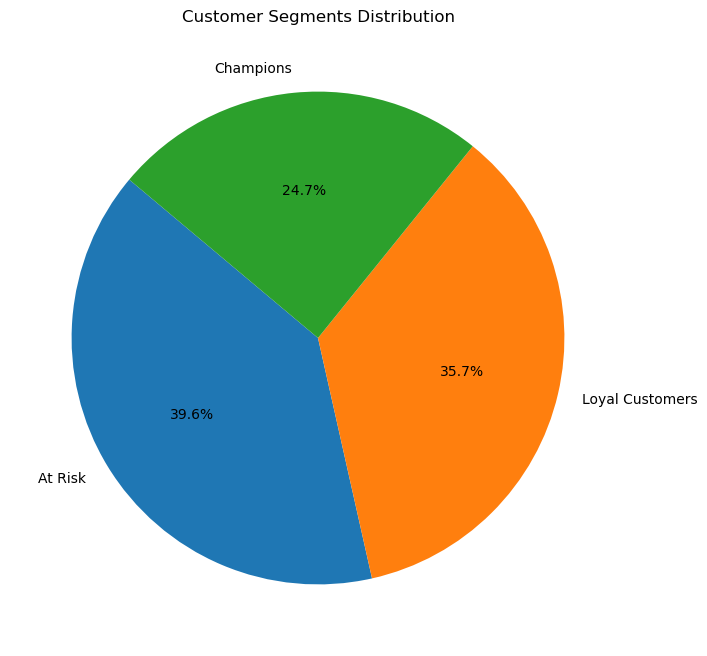

In [56]:
segment_pie = rfm['Segment'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(segment_pie, labels=segment_pie.index, autopct='%1.1f%%', startangle=140)
plt.title("Customer Segments Distribution")
plt.show()
